# Evolución de pablaciones

## Evoluciones de una especie

Evolución de una población de una especie. En nuestro modelo consideramos sitios ocupados por la especie, llamados $A$, y sitios vacíos, $E$. Tenemos un total de $N$ sitios, de los cuales $n$ son $A$ y $(N-n)$ son $E$. Evolucionan en el tiempo a través de las siguientes dos tipos de interacciones:
1. Interacción de un individuo (ocurren con frecuencia $1-\mu$): se escoge un sitios, y si es $A$, con probabilidad d puede ocurrir el evento de muerte y ese lugar pasar a ser una $E$.
2. Interacción de dos individuos (ocurren con frecuencia $\mu$): se escogen dos sitios y se sigue de la siguiente manera:
    - Si son $A$ y $A$, entonces con probabilidad $c$ ocurre el evento de competición y los sitios pasan a ser $A$ y $E$.
    - Si son $A$ y $E$, entonces con probabilidad $b$ ocurre el evento de nacimiento y los sitios pasan a ser $A$ y $A$.

In [7]:
# imoprt libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
# Population evolution: first proposal
def population_evolution(N, n_initial, mu, d, c, b, t_max):
    #Initialization of n
    n = n_initial

    #Initialization of the list of n
    history_n = [n]

    #Iterate over time
    for t in range(t_max):
        #Choice he the interaction (mu: single, 1-mu: double)
        if random.random() < mu:
            #Single interaction
            place = random.randint(0, N-1)
            if place < n: # The place choose is A
                if random.random() < d:
                    # Dying proccess occurs (A -> E)
                    n = n - 1   # "A" site is converted to "E"
        else:
            #Double interaction
            place1, place2 = random.sample(range(N), 2)
            if place1 < n and place2 < n: # Both places are A
                if random.random() < c:
                    # Competition proccess occurs (A + A -> A + E)
                    n = n - 1  # "A" site is converted to "E"
            elif (place1 < n and place2 >= n) or (place1 >= n and place2 < n):
                # Exactly one place is A
                if random.random() < b:
                    # Birth proccess occurs (A + E -> A + A)
                    n = n + 1  # "E" site is converted to "A"
        
        #Append the new value of n to the history
        history_n.append(n)
    
    return history_n

In [8]:
def ensamble_population_evolution(N, n_initial, mu, d, c, b, t_max, n_runs):
    #Initialization of the list of n
    history_n = np.zeros((n_runs, t_max+1))

    #Iterate over the number of runs
    for i in tqdm(range(n_runs)):
        history_n[i, :] = population_evolution(N, n_initial, mu, d, c, b, t_max)
    
    return history_n

In [19]:
# Observables
def get_density_from_ensamble(history_n, N):
    return np.mean(history_n, axis=0) / N

def get_variance_from_ensamble(history_n, N):
    return np.var(history_n, axis=0) / (N*N)

#### $N = 100$: simulación para $N$ grande.

In [24]:
# Parameters 
N = 100         # Number of sites
n_initial = 100  # Initial number of A individuals
mu = 0.5        # Fraction of single interactions
d = 0.5         # Death rate
c = 0.5         # Competition rate
b = 0.5         # Birth rate
t_max = 2000    # Maximum time
n_runs = 10000    # Number of runs

In [25]:
# Simulation
history_n = ensamble_population_evolution(N, n_initial, mu, d, c, b, t_max, n_runs)

100%|██████████| 10000/10000 [00:44<00:00, 222.54it/s]


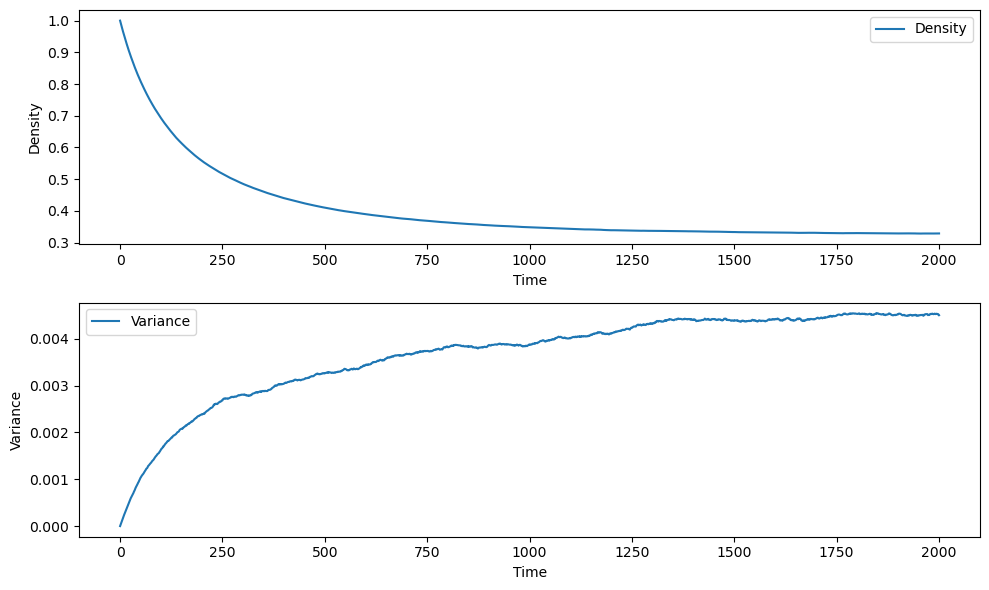

In [28]:
# Observables
density = get_density_from_ensamble(history_n, N)
variance = get_variance_from_ensamble(history_n, N)

# Plots
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
ax[0].plot(density, label='Density')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Density')
ax[0].legend()
#ax[0].set_ylim(0.3, 0.4)
ax[1].plot(variance, label='Variance')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Variance')
ax[1].legend()
plt.tight_layout()
plt.show()

#### $N = 10$. Simulación para $N$ chico.

In [29]:
# Parameters 
N = 10          # Number of sites
n_initial = 10  # Initial number of A individuals
mu = 0.5        # Fraction of single interactions
d = 0.5         # Death rate
c = 0.5         # Competition rate
b = 0.5         # Birth rate
t_max = 2000    # Maximum time
n_runs = 10000    # Number of runs

In [30]:
# Simulation
history_n2 = ensamble_population_evolution(N, n_initial, mu, d, c, b, t_max, n_runs)

100%|██████████| 10000/10000 [00:44<00:00, 224.84it/s]


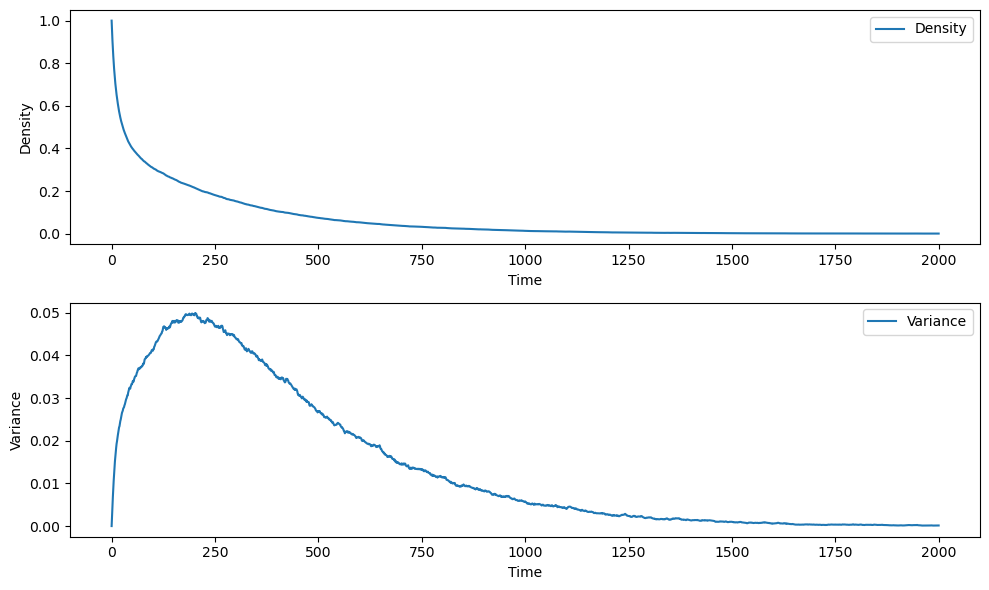

In [32]:
# Observables
density = get_density_from_ensamble(history_n2, N)
variance = get_variance_from_ensamble(history_n2, N)

# Plots
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
ax[0].plot(density, label='Density')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Density')
ax[0].legend()
#ax[0].set_ylim(0.3, 0.4)
ax[1].plot(variance, label='Variance')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Variance')
ax[1].legend()
plt.tight_layout()
plt.show()

Vemos que para los mismos parámetros la población desaparece al tomar un tamaño de población más pequeño.

## Evoluciones de dos especies

In [ ]:
# 